# 為了想要讓數據跑快一點，所以上網查了一些方法讓電腦能夠用GPU跑，發現跟之前CPU比起來跑得比較快，且準確率比較高

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas
import tensorflow as tf

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
mnist_train=x_train.reshape(60000,784)
mnist_test=x_test.reshape(10000,784)

In [7]:
from keras.utils import np_utils

In [8]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adadelta
from keras.optimizers import SGD

# 開始先使用兩層來學習先比較第一層還有第二層哪個影響比較大

In [10]:
model = Sequential()
model.add(Dense(15,input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
activation_1 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                480       
_________________________________________________________________
activation_2 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 12,565
Trainable params: 12,565
Non-trainable params: 0


In [11]:
model.fit(mnist_train,y_train,batch_size=100,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0897 - acc: 0.1505
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0873 - acc: 0.2774
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0858 - acc: 0.3283
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0843 - acc: 0.3561
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0826 - acc: 0.3822
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0808 - acc: 0.3993
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0787 - acc: 0.4157
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0765 - acc: 0.4334
Epoch 9/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0742 - acc: 0.4765
Epoch 10/20
60000/60000 [===========================

In [12]:
model_2 = Sequential()
model_2.add(Dense(20,input_dim=784))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))
model_2.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_2.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0898 - acc: 0.1928
Epoch 2/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0878 - acc: 0.2515
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0864 - acc: 0.2722
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0849 - acc: 0.2953
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0832 - acc: 0.3054
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0817 - acc: 0.3130
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0803 - acc: 0.3269
Epoch 8/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0789 - acc: 0.3476
Epoch 9/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0776 - acc: 0.3654
Epoch 10/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0764 - acc: 0.3896

# 結果好像差不多因此在其中一個的基礎下多加一層，結果變得更爛

In [14]:
model_3 = Sequential()
model_3.add(Dense(20,input_dim=784))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(10))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(5))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))
model_3.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_7 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
_________________________________________________________________
activation_9 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
__________

In [15]:
model_3.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0904 - acc: 0.0883
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0902 - acc: 0.1070
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0900 - acc: 0.1153
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0898 - acc: 0.1126
Epoch 5/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0897 - acc: 0.1124
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0896 - acc: 0.1124
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0895 - acc: 0.1124
Epoch 8/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0895 - acc: 0.1130
Epoch 9/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0894 - acc: 0.1165
Epoch 10/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0893 - acc: 0.1304

In [16]:
model_4 = Sequential()
model_4.add(Dense(20,input_dim=784))
model_4.add(Activation('sigmoid'))
model_4.add(Dense(10))
model_4.add(Activation('sigmoid'))
model_4.add(Dense(10))
model_4.add(Activation('sigmoid'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))
model_4.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_11 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
__________

In [17]:
model_4.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0922 - acc: 0.0987
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0910 - acc: 0.0987
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0905 - acc: 0.1015
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0902 - acc: 0.1280
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0899 - acc: 0.1465
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0897 - acc: 0.2012
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0895 - acc: 0.2415
Epoch 8/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0894 - acc: 0.2389
Epoch 9/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0893 - acc: 0.2298
Epoch 10/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0892 - acc: 0.2150

In [18]:
model_5 = Sequential()
model_5.add(Dense(20,input_dim=784))
model_5.add(Activation('sigmoid'))
model_5.add(Dense(100))
model_5.add(Activation('sigmoid'))
model_5.add(Dense(20))
model_5.add(Activation('sigmoid'))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))
model_5.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_15 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               2100      
_________________________________________________________________
activation_16 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                2020      
_________________________________________________________________
activation_17 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
__________

In [19]:
model_5.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0907 - acc: 0.1124
Epoch 2/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0900 - acc: 0.1124
Epoch 3/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0898 - acc: 0.1137
Epoch 4/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0896 - acc: 0.1148
Epoch 5/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0896 - acc: 0.1174
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0895 - acc: 0.1189
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0894 - acc: 0.1286
Epoch 8/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0893 - acc: 0.1424
Epoch 9/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0892 - acc: 0.1553
Epoch 10/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0891 - acc: 0.1617

In [20]:
model_6 = Sequential()
model_6.add(Dense(4,input_dim=784))
model_6.add(Activation('sigmoid'))
model_6.add(Dense(2))
model_6.add(Activation('sigmoid'))
model_6.add(Dense(2))
model_6.add(Activation('sigmoid'))
model_6.add(Dense(10))
model_6.add(Activation('softmax'))
model_6.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_19 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_20 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 6         
_________________________________________________________________
activation_21 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                30        
__________

In [21]:
model_6.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0905 - acc: 0.1022
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0903 - acc: 0.1022
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0902 - acc: 0.1022
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0901 - acc: 0.1022
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0900 - acc: 0.1022
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0900 - acc: 0.1022
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0899 - acc: 0.1169
Epoch 8/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0899 - acc: 0.1601
Epoch 9/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0899 - acc: 0.1740
Epoch 10/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0899 - acc: 0.1943

In [22]:
model_7 = Sequential()
model_7.add(Dense(4,input_dim=784))
model_7.add(Activation('sigmoid'))
model_7.add(Dense(200))
model_7.add(Activation('sigmoid'))
model_7.add(Dense(50))
model_7.add(Activation('sigmoid'))
model_7.add(Dense(10))
model_7.add(Activation('softmax'))
model_7.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_23 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 200)               1000      
_________________________________________________________________
activation_24 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 50)                10050     
_________________________________________________________________
activation_25 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
__________

In [23]:
model_7.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0910 - acc: 0.1040
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0901 - acc: 0.1124
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0900 - acc: 0.1124
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0900 - acc: 0.1124
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0900 - acc: 0.1124
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0900 - acc: 0.1124
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0900 - acc: 0.1124
Epoch 8/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0899 - acc: 0.1124
Epoch 9/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0899 - acc: 0.1124
Epoch 10/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0899 - acc: 0.1124

# 在各種嘗試下都沒起色，因此決定放棄sigmoid並且換個loss function試試看

In [24]:
model_8 = Sequential()
model_8.add(Dense(4,input_dim=784))
model_8.add(Activation('relu'))
model_8.add(Dense(200))
model_8.add(Activation('relu'))
model_8.add(Dense(50))
model_8.add(Activation('relu'))
model_8.add(Dense(10))
model_8.add(Activation('softmax'))
model_8.compile(loss='hinge',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_27 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 200)               1000      
_________________________________________________________________
activation_28 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 50)                10050     
_________________________________________________________________
activation_29 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                510       
__________

# 好像好了不少，但是還是不超過六成

In [25]:
model_8.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.9585 - acc: 0.4158
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9514 - acc: 0.4859
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9507 - acc: 0.4927
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9460 - acc: 0.5399
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9438 - acc: 0.5626
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9431 - acc: 0.5692
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9429 - acc: 0.5710
Epoch 8/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9427 - acc: 0.5725
Epoch 9/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9426 - acc: 0.5738
Epoch 10/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9426 - acc: 0.5740

In [26]:
model_9 = Sequential()
model_9.add(Dense(20,input_dim=784))
model_9.add(Activation('relu'))
model_9.add(Dense(200))
model_9.add(Activation('relu'))
model_9.add(Dense(50))
model_9.add(Activation('relu'))
model_9.add(Dense(10))
model_9.add(Activation('softmax'))
model_9.compile(loss='hinge',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_31 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 200)               4200      
_________________________________________________________________
activation_32 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 50)                10050     
_________________________________________________________________
activation_33 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                510       
__________

In [27]:
model_9.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.9873 - acc: 0.1265
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9749 - acc: 0.2513
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.9721 - acc: 0.2792
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.9690 - acc: 0.3103
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9645 - acc: 0.3554
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9640 - acc: 0.3601
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.9637 - acc: 0.3626
Epoch 8/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9635 - acc: 0.3648
Epoch 9/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9634 - acc: 0.3658
Epoch 10/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.9633 - acc: 0.3669

In [28]:
model_10 = Sequential()
model_10.add(Dense(15,input_dim=784))
model_10.add(Activation('relu'))
model_10.add(Dense(30))
model_10.add(Activation('relu'))
model_10.add(Dense(10))
model_10.add(Activation('softmax'))
model_10.compile(loss='hinge',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 15)                11775     
_________________________________________________________________
activation_35 (Activation)   (None, 15)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 30)                480       
_________________________________________________________________
activation_36 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_37 (Activation)   (None, 10)                0         
Total params: 12,565
Trainable params: 12,565
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_10.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.9759 - acc: 0.2408
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9702 - acc: 0.2974
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9492 - acc: 0.5081
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9452 - acc: 0.5475
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9445 - acc: 0.5552
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9442 - acc: 0.5582
Epoch 7/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.9439 - acc: 0.5611
Epoch 8/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9437 - acc: 0.5632
Epoch 9/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.9416 - acc: 0.5836
Epoch 10/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.9387 - acc: 0.6127

# 使用mean_squared_logarithmic_error第一次突破九成

In [30]:
model_11 = Sequential()
model_11.add(Dense(15,input_dim=784))
model_11.add(Activation('relu'))
model_11.add(Dense(30))
model_11.add(Activation('relu'))
model_11.add(Dense(10))
model_11.add(Activation('softmax'))
model_11.compile(loss='mean_squared_logarithmic_error',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_11.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 15)                11775     
_________________________________________________________________
activation_38 (Activation)   (None, 15)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 30)                480       
_________________________________________________________________
activation_39 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_40 (Activation)   (None, 10)                0         
Total params: 12,565
Trainable params: 12,565
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_11.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0479 - acc: 0.4763
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0237 - acc: 0.7339
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0196 - acc: 0.7671
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0180 - acc: 0.7855
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0171 - acc: 0.7914
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0163 - acc: 0.8003
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0157 - acc: 0.8044
Epoch 8/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0153 - acc: 0.8083
Epoch 9/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0148 - acc: 0.8112
Epoch 10/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0145 - acc: 0.8137

# 覺得神經元應該由大排到小所以嘗試看看

model_12 = Sequential()
model_12.add(Dense(30,input_dim=784))
model_12.add(Activation('relu'))
model_12.add(Dense(20))
model_12.add(Activation('relu'))
model_12.add(Dense(10))
model_12.add(Activation('softmax'))
model_12.compile(loss='mean_squared_logarithmic_error',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_12.summary()

In [33]:
model_12.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0517 - acc: 0.4562
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0255 - acc: 0.7311
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0209 - acc: 0.7801
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0198 - acc: 0.7923
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0189 - acc: 0.8019
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0180 - acc: 0.8106
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0174 - acc: 0.8173
Epoch 8/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0171 - acc: 0.8208
Epoch 9/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0166 - acc: 0.8257
Epoch 10/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0164 - acc: 0.8279

In [34]:
model_13 = Sequential()
model_13.add(Dense(30,input_dim=784))
model_13.add(Activation('relu'))
model_13.add(Dense(200))
model_13.add(Activation('relu'))
model_13.add(Dense(10))
model_13.add(Activation('softmax'))
model_13.compile(loss='mean_squared_logarithmic_error',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_13.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 30)                23550     
_________________________________________________________________
activation_44 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 200)               6200      
_________________________________________________________________
activation_45 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                2010      
_________________________________________________________________
activation_46 (Activation)   (None, 10)                0         
Total params: 31,760
Trainable params: 31,760
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_13.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0679 - acc: 0.2845
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0484 - acc: 0.4904
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0430 - acc: 0.5480
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0373 - acc: 0.6071
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0329 - acc: 0.6532
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0288 - acc: 0.6959
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0279 - acc: 0.7056
Epoch 8/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0273 - acc: 0.7123
Epoch 9/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0270 - acc: 0.7154
Epoch 10/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0266 - acc: 0.7199

# 發現由大排到小效果都不錯英此開始增加層數

In [36]:
model_14 = Sequential()
model_14.add(Dense(50,input_dim=784))
model_14.add(Activation('relu'))
model_14.add(Dense(40))
model_14.add(Activation('relu'))
model_14.add(Dense(30))
model_14.add(Activation('relu'))
model_14.add(Dense(20))
model_14.add(Activation('relu'))
model_14.add(Dense(10))
model_14.add(Activation('softmax'))
model_14.compile(loss='mean_squared_logarithmic_error',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_14.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_47 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 40)                2040      
_________________________________________________________________
activation_48 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 30)                1230      
_________________________________________________________________
activation_49 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 20)                620       
__________

In [37]:
model_14.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0464 - acc: 0.5030
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0352 - acc: 0.6251
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0307 - acc: 0.6732
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0254 - acc: 0.7292
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0242 - acc: 0.7426
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0237 - acc: 0.7481
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0232 - acc: 0.7539
Epoch 8/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0227 - acc: 0.7581
Epoch 9/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0183 - acc: 0.8011
Epoch 10/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0092 - acc: 0.8972

# 這方法大概最好就9成5了

model_15 = Sequential()
model_15.add(Dense(60,input_dim=784))
model_15.add(Activation('relu'))
model_15.add(Dense(50))
model_15.add(Activation('relu'))
model_15.add(Dense(40))
model_15.add(Activation('relu'))
model_15.add(Dense(30))
model_15.add(Activation('relu'))
model_15.add(Dense(10))
model_15.add(Activation('softmax'))
model_15.compile(loss='mean_squared_logarithmic_error',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_15.summary()

In [43]:
model_15_fitted=model_15.fit(mnist_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0480 - acc: 0.4853
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0345 - acc: 0.6312
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0329 - acc: 0.6482
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0318 - acc: 0.6559
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0307 - acc: 0.6593
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0286 - acc: 0.6605
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0225 - acc: 0.7343
Epoch 8/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0175 - acc: 0.7925
Epoch 9/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0120 - acc: 0.8575
Epoch 10/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0070 - acc: 0.9156

# 結論:神經元應該要由大排到小且mean_squared_logarithmic_error是一個不錯的loss function

In [44]:
model_15.evaluate(mnist_test,y_test)

10000/10000 [==============================] - 1s 67us/step


[0.004184371752277672, 0.9495]

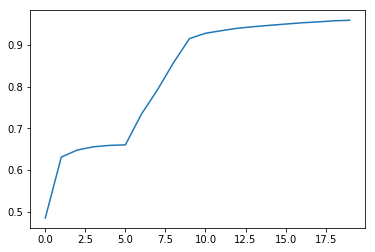

In [45]:
plt.plot(model_15_fitted.history["acc"])